<a href="https://colab.research.google.com/github/Abm32/Abm32/blob/main/facialrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from google.colab.patches import cv2_imshow
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from keras.models import load_model


In [ ]:

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

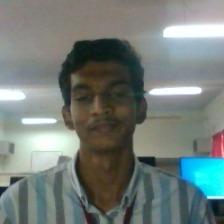

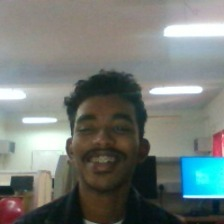

In [ ]:
# import required modules
import cv2
import matplotlib.pyplot as plt

# read the image
smile = cv2.imread('/content/drive/MyDrive/train/smile/smile-!-10.jpg')
smile1 = cv2.imread('/content/drive/MyDrive/train/smile/smile-!-1006.jpg')
sad = cv2.imread('/content/drive/MyDrive/train/sad/sad-!-0.jpg')
sad1 = cv2.imread('/content/drive/MyDrive/train/sad/sad-!-1.jpg')
angry = cv2.imread('/content/drive/MyDrive/train/angry/angry-!-1.jpg')
angry1 = cv2.imread('/content/drive/MyDrive/train/angry/angry-!-100.jpg')
calm = cv2.imread('/content/drive/MyDrive/train/calm/calm-!-1.jpg')
calm1 = cv2.imread('/content/drive/MyDrive/train/calm/calm-!-1000.jpg')
unconscious = cv2.imread('/content/drive/MyDrive/train/unconscious/unconscious-!-1464.jpg')
unconscious1 = cv2.imread('/content/drive/MyDrive/train/unconscious/unconscious-!-1465.jpg')

# convert color image into grayscale image
#img1 = cv2.cvtColor(image, cv2.IMREAD_ANYCOLOR)

# plot that grayscale image with Matplotlib
# cmap stands for colormap
#plt.imshow(img1, cmap='gray')

# display that image
#plt.show()

# Using cv2.imshow() method
# Displaying the image
cv2_imshow(smile)
cv2_imshow(smile1)

#waits for user to press any key
#(this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)

#closing all open windows
cv2.destroyAllWindows()


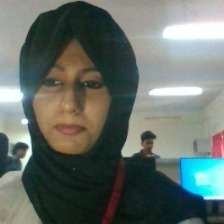

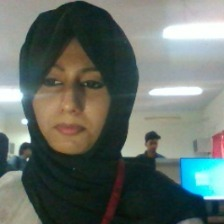

In [ ]:
cv2_imshow(sad)
cv2_imshow(sad1)

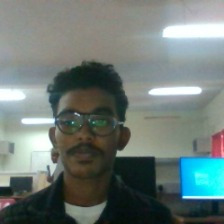

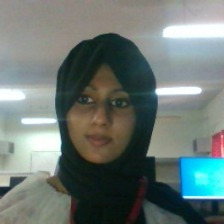

In [ ]:
cv2_imshow(calm)
cv2_imshow(calm1)

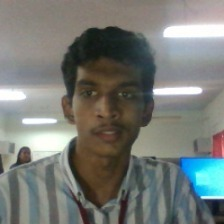

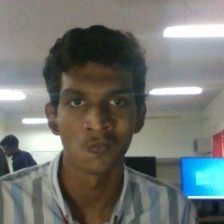

In [ ]:
cv2_imshow(angry)
cv2_imshow(angry1)

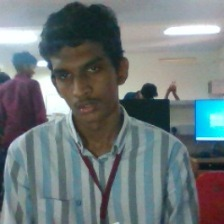

In [ ]:
cv2_imshow(unconscious)
#cv2_imshow(unconscious1)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/train/smile/smile-!-10.jpg')
np.shape(image)

(224, 224, 3)

In [ ]:
#initializing the cnn
model=Sequential()

In [ ]:
#part2-fitting the cnn to the images
#setting the array for resulting image after normalization
resultimage = np.zeros((800, 800))
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,)

In [ ]:
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3548 images belonging to 5 classes.
Found 3654 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (224,224,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(training_set,
                    validation_data=test_set,
                    steps_per_epoch=150 ,
                    epochs=30,
                    validation_steps=50 ,
                    verbose=1)

Epoch 1/30
111/150 [=====================>........] - ETA: 14s - loss: 0.0493 - acc: 0.9862

150/150 [==============================] - 48s 316ms/step - loss: 0.0493 - acc: 0.9862 - val_loss: 2.1285 - val_acc: 0.8156
